In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

from torchsummary import summary
from torch.utils.data import DataLoader
import torch as t
from torchvision import transforms, datasets
from torchsummary import summary

device = t.device('cuda' if t.cuda.is_available() else 'cpu')

In [ ]:
!nvidia-smi

Fri Mar  3 05:13:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    )

transform = transforms.Compose([ transforms.Resize((227,227)), transforms.ToTensor(), normalize])


In [ ]:
train_data = datasets.CIFAR10(root='Data', train = True, download = True, transform=transform)                                   
test_data = datasets.CIFAR10(root='Data', train = False, download = True, transform=transform)   

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting Data/cifar-10-python.tar.gz to Data
Files already downloaded and verified


In [ ]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: Data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(227, 227), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [ ]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: Data
    Split: Test
    StandardTransform
Transform: Compose(
               Resize(size=(227, 227), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [ ]:
print(type(train_data),'\n', type(test_data))


<class 'torchvision.datasets.cifar.CIFAR10'> 
 <class 'torchvision.datasets.cifar.CIFAR10'>


In [ ]:
t.manual_seed(101)

train_loader = DataLoader(train_data, batch_size = 60, shuffle = True, pin_memory = True)
test_loader = DataLoader(test_data, batch_size = 60, shuffle = False, pin_memory = True)                        

In [ ]:
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']

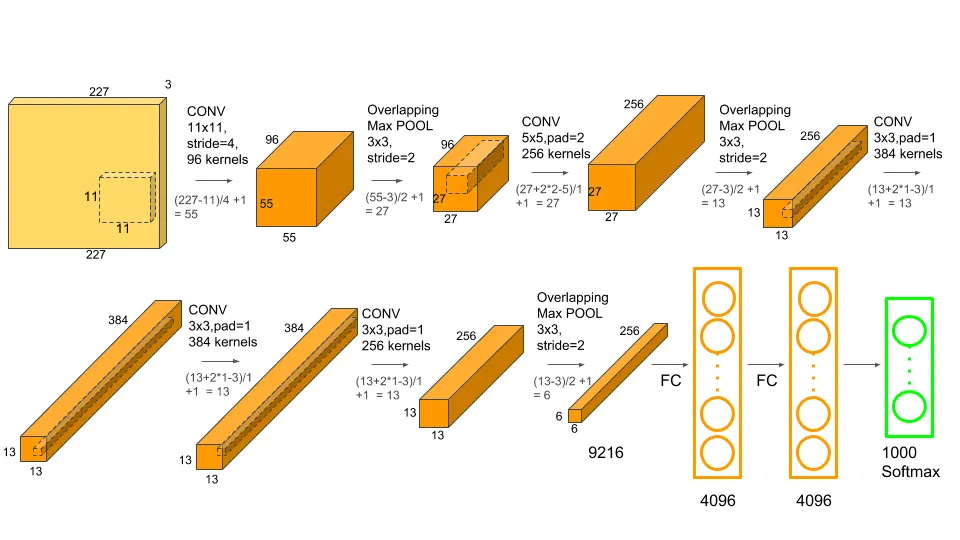

In [ ]:
class AlexNet(nn.Module):

  def __init__(self, num_classes = 10):
    super(AlexNet, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels = 3, out_channels = 96, kernel_size = 11, stride=4, padding=0),
        nn.BatchNorm2d(96),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 3, stride = 2))
    
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels = 96, out_channels = 256, kernel_size = 5, stride=1, padding = 2),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 3, stride = 2))
    
    self.layer3 = nn.Sequential(
        nn.Conv2d(in_channels = 256, out_channels = 384, kernel_size = 3, stride=1, padding = 1),
        nn.BatchNorm2d(384),
        nn.ReLU())
    
    self.layer4 = nn.Sequential(
        nn.Conv2d(in_channels = 384, out_channels = 384, kernel_size = 3, stride=1, padding = 1),
        nn.BatchNorm2d(384),
        nn.ReLU())
    
    self.layer5 = nn.Sequential(
        nn.Conv2d(in_channels = 384, out_channels = 256, kernel_size = 3, stride=1, padding = 1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 3, stride = 2))
    
    self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(9216, 4096),
            nn.ReLU())
    
    self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
    
    self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))
    

  def forward(self, x):

    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)
    out = self.layer4(out)
    out = self.layer5(out)
    out = out.reshape(out.size(0), -1)
    out = self.fc(out)
    out = self.fc1(out)
    out = self.fc2(out)
    return out


In [ ]:
t.manual_seed(101)
model = AlexNet().cuda()
model

AlexNet(
  (layer1): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  

In [ ]:
x = [param.numel() for param in  model.parameters()]
print(x)
print(sum(x))

[34848, 96, 96, 96, 614400, 256, 256, 256, 884736, 384, 384, 384, 1327104, 384, 384, 384, 884736, 256, 256, 256, 37748736, 4096, 16777216, 4096, 40960, 10]
58325066


In [ ]:
summary(model, input_size=(3, 227, 227))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
       BatchNorm2d-2           [-1, 96, 55, 55]             192
              ReLU-3           [-1, 96, 55, 55]               0
         MaxPool2d-4           [-1, 96, 27, 27]               0
            Conv2d-5          [-1, 256, 27, 27]         614,656
       BatchNorm2d-6          [-1, 256, 27, 27]             512
              ReLU-7          [-1, 256, 27, 27]               0
         MaxPool2d-8          [-1, 256, 13, 13]               0
            Conv2d-9          [-1, 384, 13, 13]         885,120
      BatchNorm2d-10          [-1, 384, 13, 13]             768
             ReLU-11          [-1, 384, 13, 13]               0
           Conv2d-12          [-1, 384, 13, 13]       1,327,488
      BatchNorm2d-13          [-1, 384, 13, 13]             768
             ReLU-14          [-1, 384,